# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기 </br>
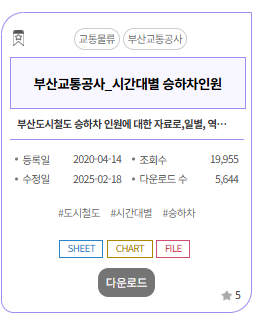


In [1]:
import pandas as pd
file_path = "./ref/일별 역별 시간대별 승하차(2023년 12월).csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head() # 맨앞 데이터 5개 가져오기
# data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2023-01-01,일,승차,6311,0,0,0,9,...,435,398,336,272,130,138,71,66,7,3
1,95,다대포해수욕장,2023-01-01,일,하차,5839,2,0,0,0,...,313,299,269,126,128,94,115,71,43,29
2,95,다대포해수욕장,2023-01-02,월,승차,4264,0,0,0,18,...,417,262,243,224,133,87,79,62,8,0
3,95,다대포해수욕장,2023-01-02,월,하차,3300,0,0,0,0,...,259,262,260,285,216,153,103,105,57,29
4,95,다대포해수욕장,2023-01-03,화,승차,4431,1,1,0,27,...,401,310,310,229,132,110,71,65,21,0


In [2]:
columns0 = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns0 + time_col+ ['24~01H'] 
df.columns = columns
df = df.loc[:,:'total']

In [3]:
df.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2023-01-01,일,승차,6311
1,95,다대포해수욕장,2023-01-01,일,하차,5839
2,95,다대포해수욕장,2023-01-02,월,승차,4264
3,95,다대포해수욕장,2023-01-02,월,하차,3300
4,95,다대포해수욕장,2023-01-03,화,승차,4431


In [4]:
data = df.groupby(['num','name','date']).sum().reset_index()
# data[data['date']=='2025-01-01']
data

,num,name,date,week,type,total
0,95,다대포해수욕장,2023-01-01,일일,승차하차,12150
1,95,다대포해수욕장,2023-01-02,월월,승차하차,7564
2,95,다대포해수욕장,2023-01-03,화화,승차하차,7937
3,95,다대포해수욕장,2023-01-04,수수,승차하차,8338
4,95,다대포해수욕장,2023-01-05,목목,승차하차,8449
...,...,...,...,...,...,...
40875,414,안평,2023-12-27,수수,승차하차,4081
40876,414,안평,2023-12-28,목목,승차하차,4159
40877,414,안평,2023-12-29,금금,승차하차,4192
40878,414,안평,2023-12-30,토토,승차하차,3281


In [5]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head()

,name,date,total
10950,1동래,2023-01-01,19692
10951,1동래,2023-01-02,32591
10952,1동래,2023-01-03,33105
10953,1동래,2023-01-04,33511
10954,1동래,2023-01-05,35943


In [6]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,1동래,8062476
1,1서면,16816218
2,1연산,8301582
3,2덕천,2767436
4,2서면,11291496
...,...,...
114,토성,6212747
115,하단,12980735
116,해운대,9657955
117,호포,889486


In [7]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
1,1서면,16816218
72,부산역,16304495
76,사상,15302694
81,서면,14606432
83,센텀시티,14005747
32,남포,13324956
115,하단,12980735
99,자갈치,12775651
75,부전,11805080
13,경성대부경대,11647344


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path ="./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [9]:
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [10]:
# !pip install squarify

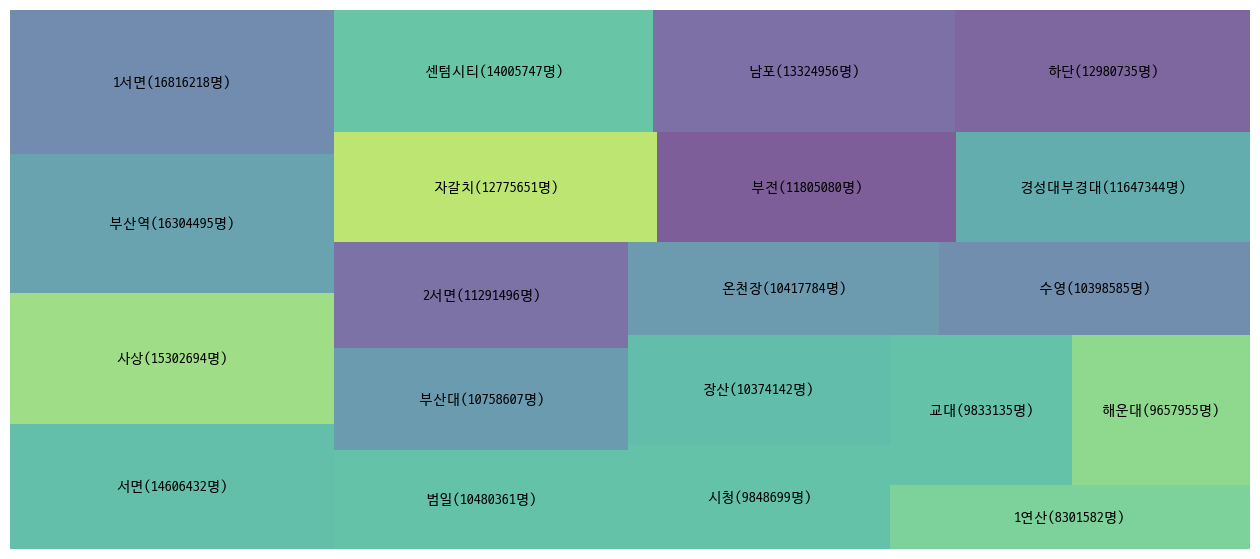

In [11]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha= 0.7)
plt.rcParams['font.size'] = 10
# plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.savefig("subway01.png")
plt.show()

# 인사이트
1. 서면, 부산역, 사상 등
- 중심 상업지구 및 교통 중심지로 작용하는 곳이기 때문에 높은 수치를 보임

2. 센텀시티, 자갈치, 남포
- 대표적인 상업, 비니지스 지역
- 자갈치, 남포는 관광객 유입이 많은 지역

3. 대학가 및 주거지역은 상대적으로 낮음
- 경성대 부경대역, 부산대, 교대 등.
- 주요 대학가 지역은 상업지구보다는 낮은 편이지만 높은 유동인구를 기록함.